In [1]:
;; Lets use data from Albanys Ramadda Server
year = 2014
var = "u"
u_url = "http://ramadda.atmos.albany.edu:8080/repository/opendap/Top/UAlbany+Repository/CFSR/"+year+"/"+var+"."+year+".0p5.anl.nc/entry.das.nc"
var = "v"
v_url = "http://ramadda.atmos.albany.edu:8080/repository/opendap/Top/UAlbany+Repository/CFSR/"+year+"/"+var+"."+year+".0p5.anl.nc/entry.das.nc"




In [2]:
;; Just pull in the first time and first level from the files.

u_f = addfile(u_url,"r")
v_f = addfile(v_url,"r")
u        = u_f->u(0,0,:,:)
v        = v_f->v(0,0,:,:)
wspd = sqrt(u^2 + v^2)
copy_VarCoords( u, wspd)


In [11]:
;  Make the output workstation and set up some basic vector plot resources
wks = gsn_open_wks("png","vector")            ; send graphics to PNG file

res                      := True               ; plot mods desired
res@mpLandFillColor      = "gray"            ; set land to be gray
res@mpMinLonF            =  65.               ; select a subregion
res@mpMaxLonF            =  95.
res@mpMinLatF            =   5. 
res@mpMaxLatF            =  25.

res@vcRefMagnitudeF           = 10.0             ; define vector ref mag
res@vcRefLengthF              = 0.045           ; define length of vec ref

res@gsnDraw = False
res@gsnFrame = False

In [12]:
;; Typically NCL puts the Reference vector at the bottom of the plot
res@vcRefAnnoSide = "Top"   ;; This will anchor it to the top of the plot.
res@vcRefAnnoOrthogonalPosF   = -1.  ; Then we can move it down the size of the plot to the bottom right corner

./vector

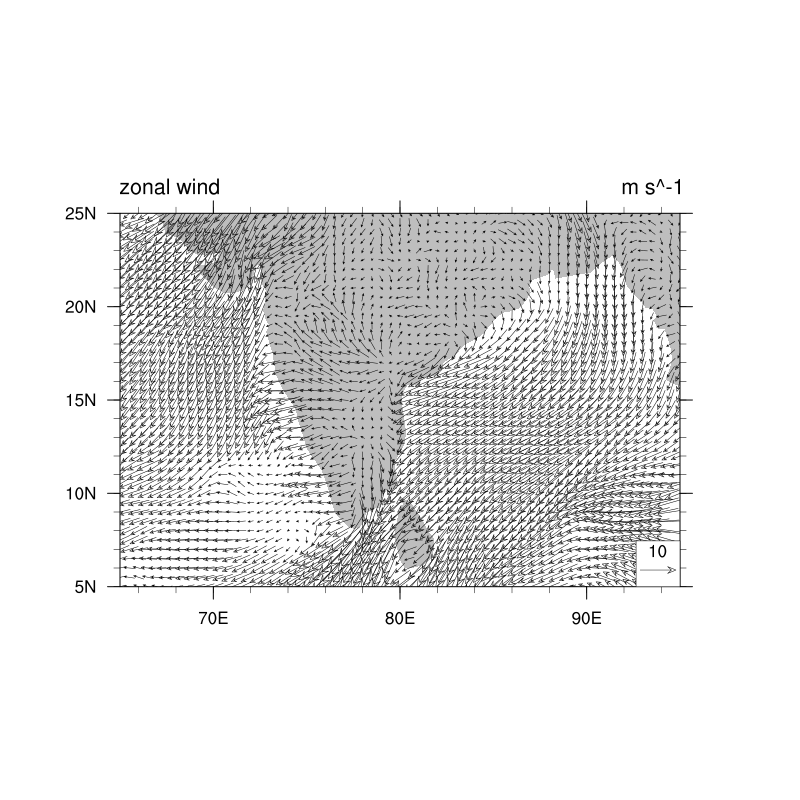

In [13]:
plot=gsn_csm_vector_map(wks,u,v,res)
draw(plot)
frame(wks)